# BPSK调制类型去噪数据可视化

本Notebook用于可视化经过高斯过程回归(GPR)去噪处理的BPSK调制信号数据。
我们将分析从18dB到-20dB的不同信噪比下的I/Q信号曲线和星座图。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置图像样式
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [2]:
# 加载去噪数据集
denoised_file_path = '/home/test/2/2.4/radioML-v2/denoised_datasets/denoised_data_gpr_c0ce206cf7ff.pkl'

if os.path.exists(denoised_file_path):
    print(f"正在加载去噪数据集: {denoised_file_path}")
    with open(denoised_file_path, 'rb') as f:
        denoised_data = pickle.load(f)
    
    X_all = denoised_data['X_all']
    y_all = denoised_data['y_all']
    snr_values_all = denoised_data['snr_values_all']
    
    print(f"数据形状: X_all {X_all.shape}, y_all {y_all.shape}, SNR values {snr_values_all.shape}")
    print(f"SNR值范围: {np.min(snr_values_all):.1f}dB 到 {np.max(snr_values_all):.1f}dB")
    print(f"调制类型标签范围: {np.min(y_all)} 到 {np.max(y_all)}")
else:
    print(f"错误: 找不到去噪数据文件 {denoised_file_path}")
    raise FileNotFoundError(f"去噪数据文件不存在: {denoised_file_path}")

正在加载去噪数据集: /home/test/2/2.4/radioML-v2/denoised_datasets/denoised_data_gpr_c0ce206cf7ff.pkl
数据形状: X_all (220000, 2, 128), y_all (220000,), SNR values (220000,)
SNR值范围: -20.0dB 到 18.0dB
调制类型标签范围: 0 到 10


In [3]:
# 加载原始数据集以获取调制类型映射
original_dataset_path = '/home/test/2/2.4/radioML-v2/RML2016.10a_dict.pkl'

if os.path.exists(original_dataset_path):
    print(f"正在加载原始数据集获取调制类型映射: {original_dataset_path}")
    with open(original_dataset_path, 'rb') as f:
        original_dataset = pickle.load(f, encoding='latin1')
    
    # 获取调制类型列表
    mods = sorted(list(set([k[0] for k in original_dataset.keys()])))
    mod_to_index = {mod: i for i, mod in enumerate(mods)}
    index_to_mod = {i: mod for i, mod in enumerate(mods)}
    
    print(f"调制类型: {mods}")
    print(f"BPSK对应的标签索引: {mod_to_index.get('BPSK', 'Not found')}")
else:
    print(f"警告: 找不到原始数据集文件 {original_dataset_path}")
    # 如果找不到原始数据集，假设BPSK的索引(这需要根据实际情况调整)
    mods = ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
    mod_to_index = {mod: i for i, mod in enumerate(mods)}
    index_to_mod = {i: mod for i, mod in enumerate(mods)}
    print(f"使用默认调制类型映射: {mods}")
    print(f"BPSK对应的标签索引: {mod_to_index.get('BPSK', 'Not found')}")

正在加载原始数据集获取调制类型映射: /home/test/2/2.4/radioML-v2/RML2016.10a_dict.pkl
调制类型: ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
BPSK对应的标签索引: 3
调制类型: ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
BPSK对应的标签索引: 3


In [4]:
# 筛选BPSK调制类型的数据
bpsk_index = mod_to_index.get('BPSK')

if bpsk_index is not None:
    # 找到所有BPSK样本的索引
    bpsk_mask = (y_all == bpsk_index)
    bpsk_indices = np.where(bpsk_mask)[0]
    
    print(f"BPSK样本数量: {len(bpsk_indices)}")
    
    if len(bpsk_indices) > 0:
        # 提取BPSK数据
        X_bpsk = X_all[bpsk_mask]
        y_bpsk = y_all[bpsk_mask]
        snr_bpsk = snr_values_all[bpsk_mask]
        
        print(f"BPSK数据形状: {X_bpsk.shape}")
        print(f"BPSK SNR值范围: {np.min(snr_bpsk):.1f}dB 到 {np.max(snr_bpsk):.1f}dB")
        print(f"BPSK唯一SNR值: {sorted(np.unique(snr_bpsk))}")
    else:
        print("错误: 没有找到BPSK样本")
        raise ValueError("数据集中没有BPSK样本")
else:
    print("错误: 无法找到BPSK调制类型")
    raise ValueError("BPSK调制类型不在数据集中")

BPSK样本数量: 20000
BPSK数据形状: (20000, 2, 128)
BPSK SNR值范围: -20.0dB 到 18.0dB
BPSK唯一SNR值: [-20.0, -18.0, -16.0, -14.0, -12.0, -10.0, -8.0, -6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0]


In [5]:
# 提取特定SNR值的数据 (18dB到-20dB，步长为2dB)
target_snrs = list(range(18, -22, -2))  # [18, 16, 14, 12, 10, 8, 6, 4, 2, 0, -2, -4, -6, -8, -10, -12, -14, -16, -18, -20]
available_snrs = sorted(np.unique(snr_bpsk))

print(f"目标SNR值: {target_snrs}")
print(f"可用SNR值: {available_snrs}")

# 找到目标SNR值与可用SNR值的交集
valid_snrs = [snr for snr in target_snrs if snr in available_snrs]
print(f"有效SNR值: {valid_snrs}")

# 为每个有效SNR值提取数据
snr_data = {}
for snr in valid_snrs:
    snr_mask = (snr_bpsk == snr)
    snr_samples = X_bpsk[snr_mask]
    print(f"SNR {snr}dB: {len(snr_samples)} 个样本")
    snr_data[snr] = snr_samples

if not snr_data:
    print("警告: 没有找到目标SNR范围内的数据")
    # 如果没有找到目标SNR，使用所有可用的SNR
    valid_snrs = available_snrs[:10]  # 取前10个SNR值进行演示
    print(f"使用可用的SNR值进行演示: {valid_snrs}")
    for snr in valid_snrs:
        snr_mask = (snr_bpsk == snr)
        snr_samples = X_bpsk[snr_mask]
        snr_data[snr] = snr_samples

目标SNR值: [18, 16, 14, 12, 10, 8, 6, 4, 2, 0, -2, -4, -6, -8, -10, -12, -14, -16, -18, -20]
可用SNR值: [-20.0, -18.0, -16.0, -14.0, -12.0, -10.0, -8.0, -6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0]
有效SNR值: [18, 16, 14, 12, 10, 8, 6, 4, 2, 0, -2, -4, -6, -8, -10, -12, -14, -16, -18, -20]
SNR 18dB: 1000 个样本
SNR 16dB: 1000 个样本
SNR 14dB: 1000 个样本
SNR 12dB: 1000 个样本
SNR 10dB: 1000 个样本
SNR 8dB: 1000 个样本
SNR 6dB: 1000 个样本
SNR 4dB: 1000 个样本
SNR 2dB: 1000 个样本
SNR 0dB: 1000 个样本
SNR -2dB: 1000 个样本
SNR -4dB: 1000 个样本
SNR -6dB: 1000 个样本
SNR -8dB: 1000 个样本
SNR -10dB: 1000 个样本
SNR -12dB: 1000 个样本
SNR -14dB: 1000 个样本
SNR -16dB: 1000 个样本
SNR -18dB: 1000 个样本
SNR -20dB: 1000 个样本


/tmp/ipykernel_3912643/4098141309.py:41: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4098141309.py:41: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4098141309.py:41: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4098141309.py:41: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4098141309.py:41: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4098141309.py:41: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4098141309.py:41: UserWarning: Glyph 20998 (\N{CJK UN

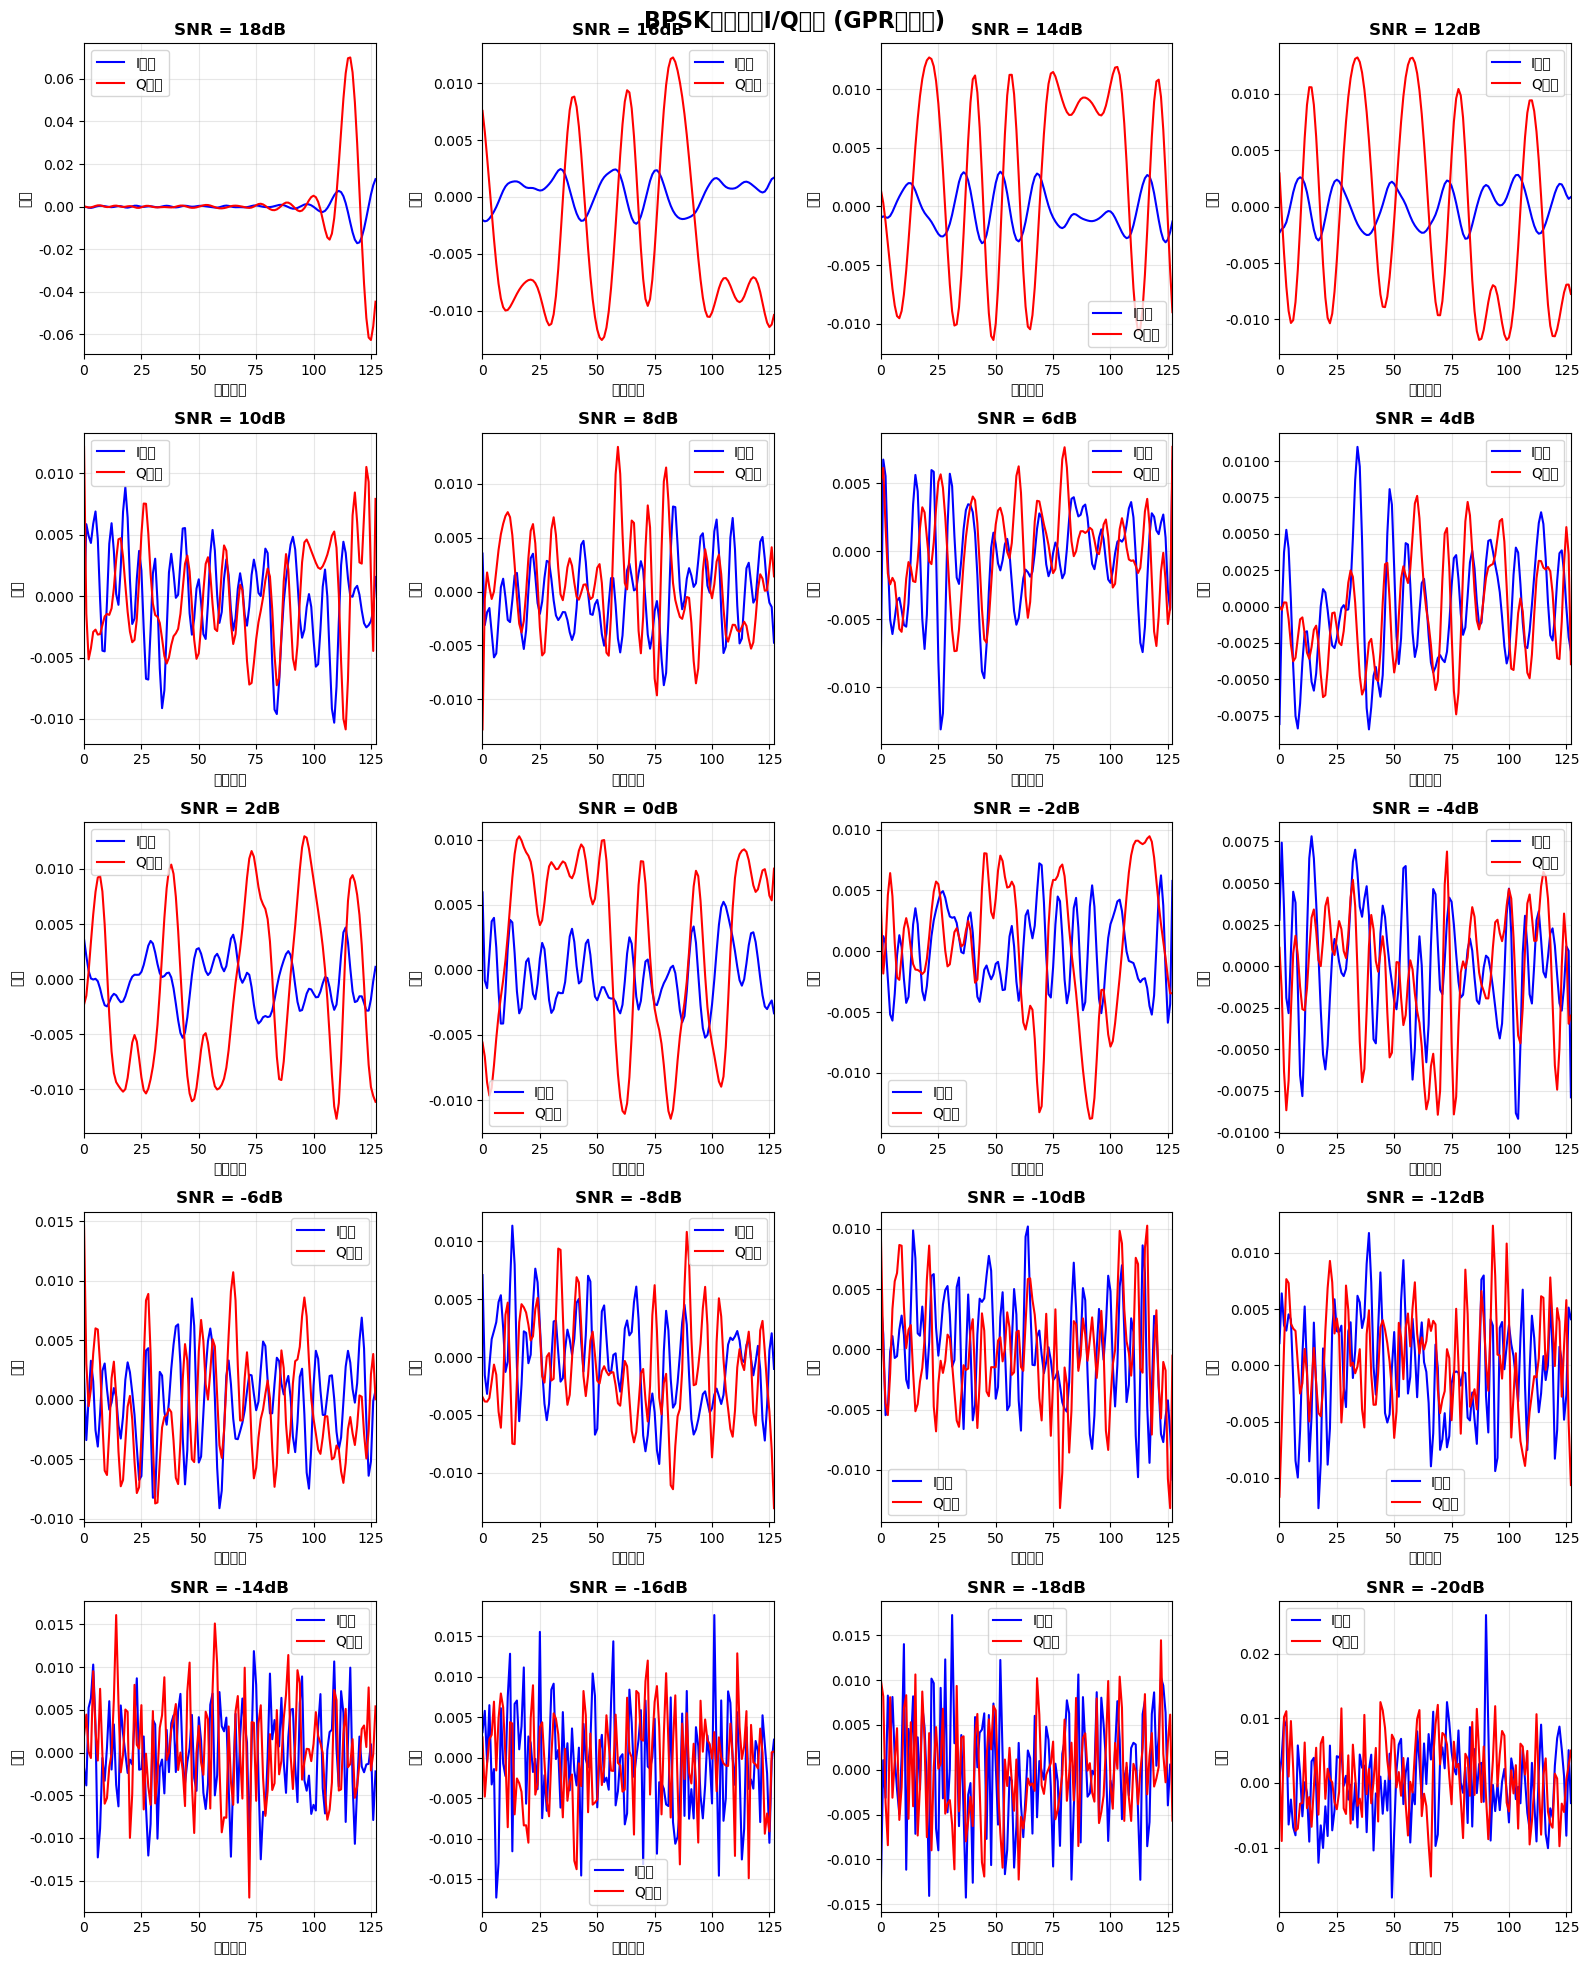

In [6]:
# 绘制I/Q信号曲线图
if snr_data:
    # 计算子图布局
    n_snrs = len(valid_snrs)
    n_cols = 4
    n_rows = (n_snrs + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    fig.suptitle('BPSK调制信号I/Q曲线 (GPR去噪后)', fontsize=16, fontweight='bold')
    
    for idx, snr in enumerate(valid_snrs):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
        
        # 取第一个样本进行可视化
        if len(snr_data[snr]) > 0:
            sample = snr_data[snr][0]  # 形状: (2, 128)
            i_component = sample[0, :]  # I分量
            q_component = sample[1, :]  # Q分量
            time_samples = np.arange(len(i_component))
            
            ax.plot(time_samples, i_component, 'b-', label='I分量', linewidth=1.5)
            ax.plot(time_samples, q_component, 'r-', label='Q分量', linewidth=1.5)
            ax.set_title(f'SNR = {snr}dB', fontweight='bold')
            ax.set_xlabel('时间样本')
            ax.set_ylabel('幅度')
            ax.legend()
            ax.grid(True, alpha=0.3)
            ax.set_xlim(0, len(i_component)-1)
    
    # 隐藏多余的子图
    for idx in range(len(valid_snrs), n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("没有数据可以绘制I/Q曲线")

/tmp/ipykernel_3912643/2140149547.py:54: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/2140149547.py:54: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/2140149547.py:54: UserWarning: Glyph 35843 (\N{CJK UNIFIED IDEOGRAPH-8C03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/2140149547.py:54: UserWarning: Glyph 21046 (\N{CJK UNIFIED IDEOGRAPH-5236}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/2140149547.py:54: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/2140149547.py:54: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/2140149547.py:54: UserWarning: Glyph 26143 (\N{CJK UN

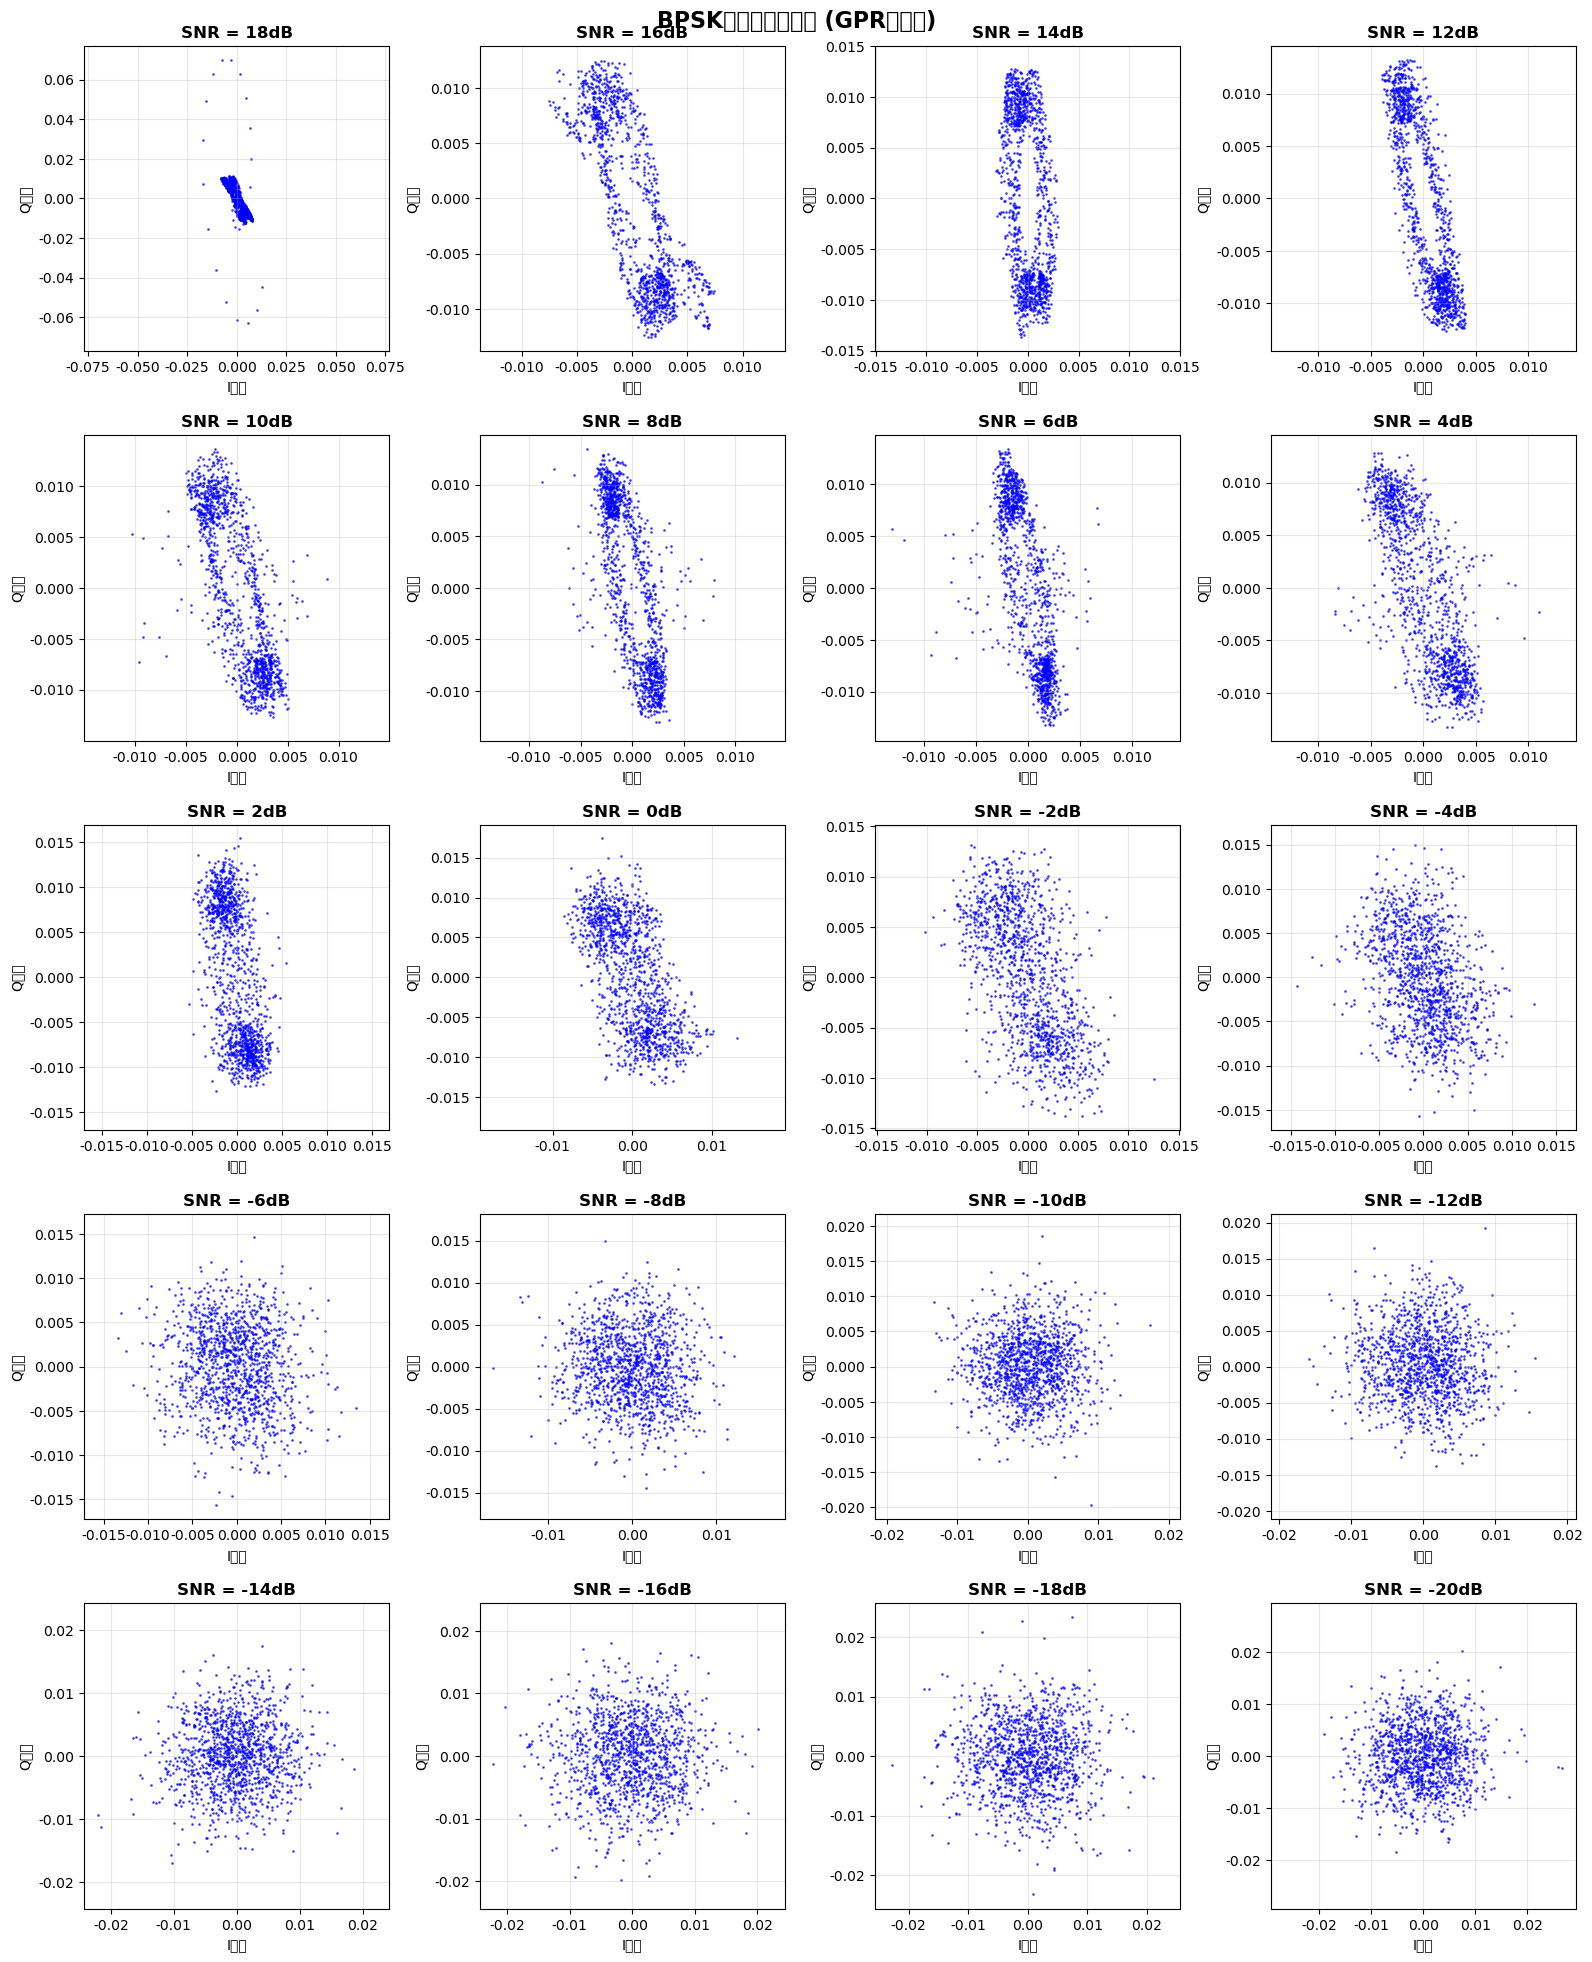

In [7]:
# 绘制星座图
if snr_data:
    # 计算子图布局
    n_snrs = len(valid_snrs)
    n_cols = 4
    n_rows = (n_snrs + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    fig.suptitle('BPSK调制信号星座图 (GPR去噪后)', fontsize=16, fontweight='bold')
    
    for idx, snr in enumerate(valid_snrs):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
        
        # 收集该SNR下所有样本的I/Q点
        samples = snr_data[snr]
        if len(samples) > 0:
            # 限制样本数量以避免图形过于拥挤
            max_samples = min(10, len(samples))
            
            all_i = []
            all_q = []
            
            for sample_idx in range(max_samples):
                sample = samples[sample_idx]
                i_component = sample[0, :]
                q_component = sample[1, :]
                all_i.extend(i_component)
                all_q.extend(q_component)
            
            # 绘制星座图
            ax.scatter(all_i, all_q, alpha=0.6, s=1, c='blue')
            ax.set_title(f'SNR = {snr}dB', fontweight='bold')
            ax.set_xlabel('I分量')
            ax.set_ylabel('Q分量')
            ax.grid(True, alpha=0.3)
            ax.set_aspect('equal')
            
            # 设置坐标轴范围
            max_val = max(np.max(np.abs(all_i)), np.max(np.abs(all_q)))
            ax.set_xlim(-max_val*1.1, max_val*1.1)
            ax.set_ylim(-max_val*1.1, max_val*1.1)
    
    # 隐藏多余的子图
    for idx in range(len(valid_snrs), n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("没有数据可以绘制星座图")

选择用于详细分析的SNR值: [18, 10, 0, -10, -20]


/tmp/ipykernel_3912643/4020495574.py:70: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4020495574.py:70: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4020495574.py:70: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4020495574.py:70: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4020495574.py:70: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4020495574.py:70: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3912643/4020495574.py:70: UserWarning: Glyph 20449 (\N{CJK UN

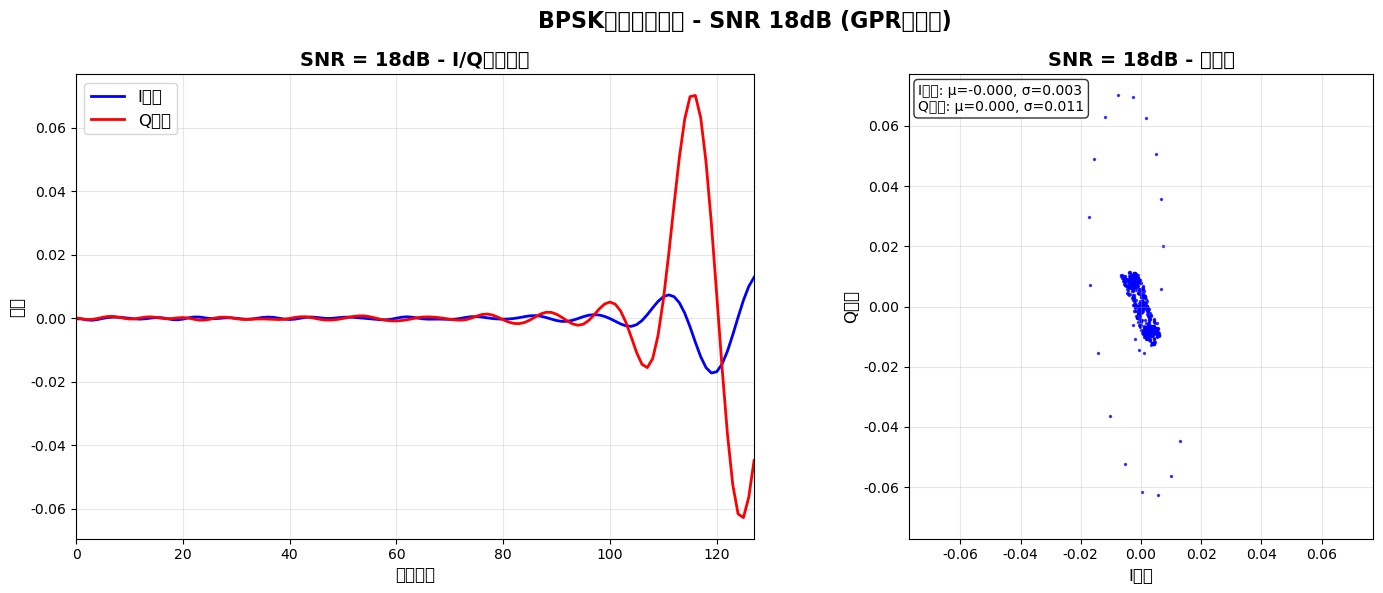

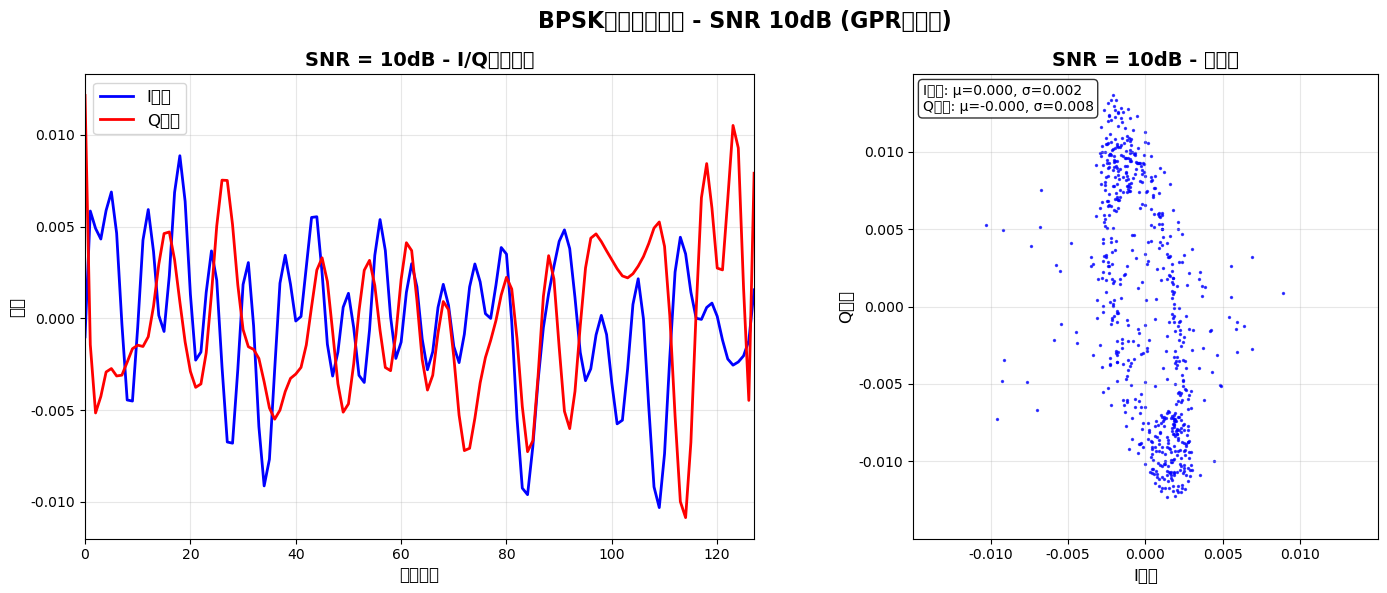

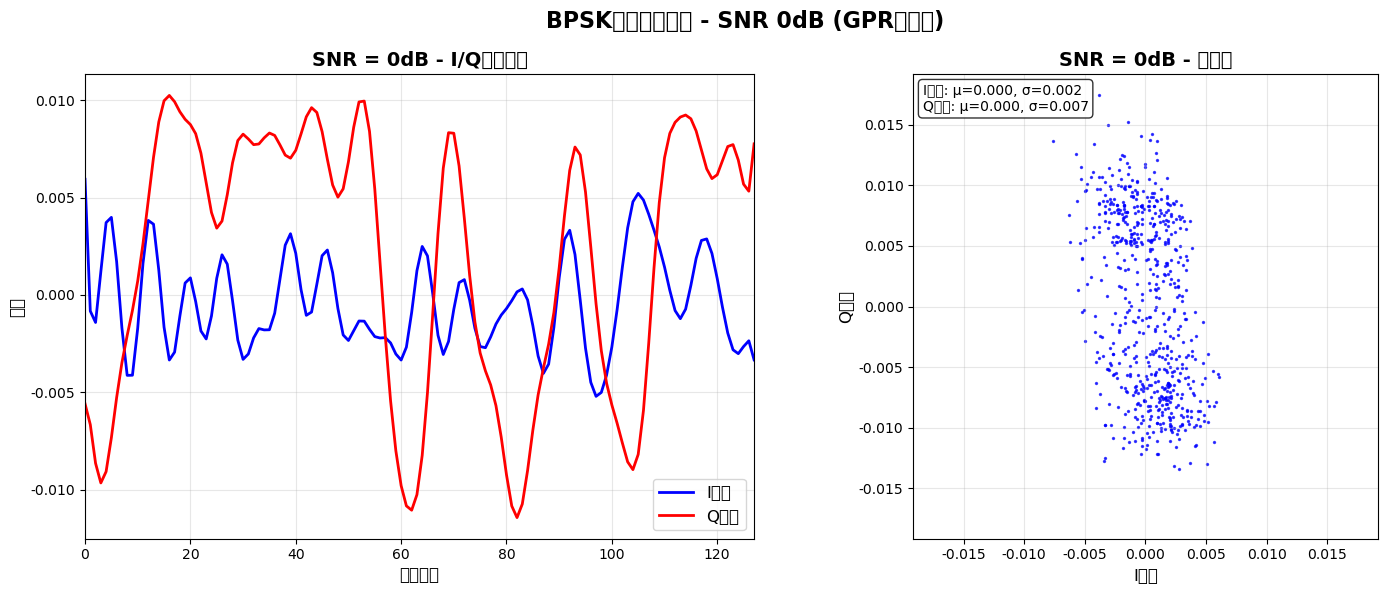

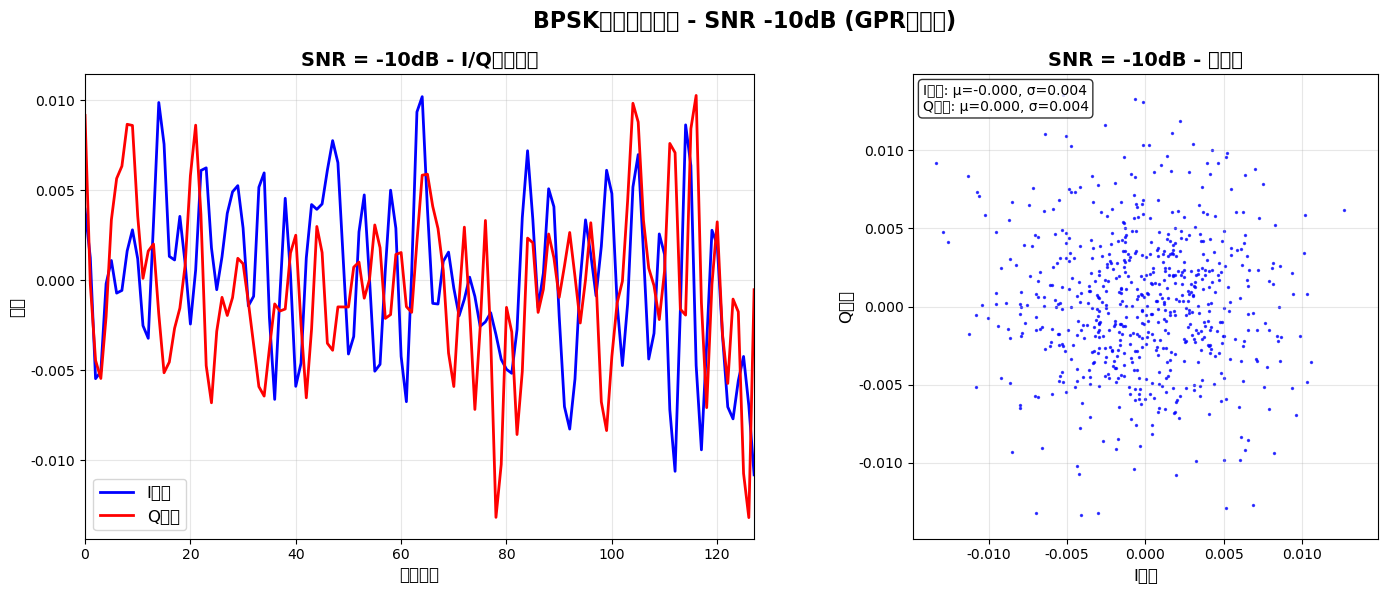

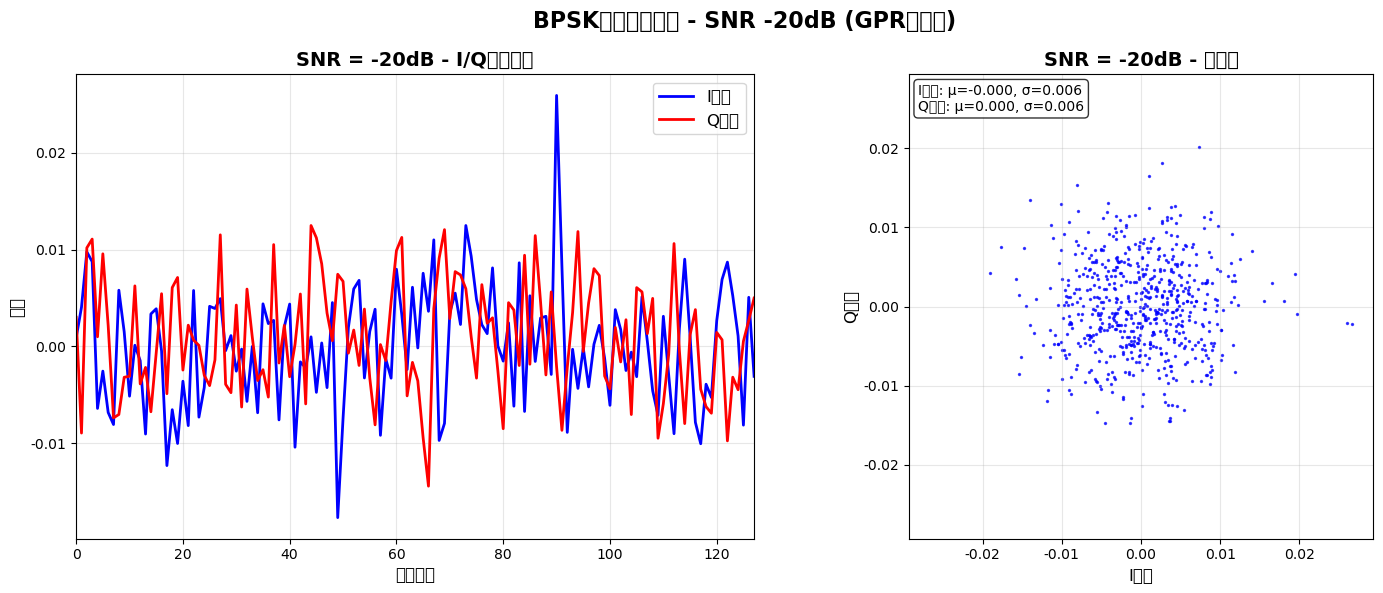

In [8]:
# 详细分析选定的SNR值
if snr_data and len(valid_snrs) > 0:
    # 选择几个代表性的SNR值进行详细分析
    selected_snrs = []
    for snr in [18, 10, 0, -10, -20]:
        if snr in valid_snrs:
            selected_snrs.append(snr)
    
    if not selected_snrs:
        # 如果没有这些SNR值，选择可用的前5个
        selected_snrs = valid_snrs[:5]
    
    print(f"选择用于详细分析的SNR值: {selected_snrs}")
    
    # 为每个选定的SNR创建一个详细的图
    for snr in selected_snrs:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        samples = snr_data[snr]
        if len(samples) > 0:
            # 取第一个样本
            sample = samples[0]
            i_component = sample[0, :]
            q_component = sample[1, :]
            time_samples = np.arange(len(i_component))
            
            # I/Q曲线图
            ax1.plot(time_samples, i_component, 'b-', label='I分量', linewidth=2)
            ax1.plot(time_samples, q_component, 'r-', label='Q分量', linewidth=2)
            ax1.set_title(f'SNR = {snr}dB - I/Q信号曲线', fontsize=14, fontweight='bold')
            ax1.set_xlabel('时间样本', fontsize=12)
            ax1.set_ylabel('幅度', fontsize=12)
            ax1.legend(fontsize=12)
            ax1.grid(True, alpha=0.3)
            ax1.set_xlim(0, len(i_component)-1)
            
            # 星座图 - 使用多个样本
            max_samples_for_constellation = min(5, len(samples))
            all_i = []
            all_q = []
            
            for sample_idx in range(max_samples_for_constellation):
                sample = samples[sample_idx]
                all_i.extend(sample[0, :])
                all_q.extend(sample[1, :])
            
            ax2.scatter(all_i, all_q, alpha=0.7, s=2, c='blue')
            ax2.set_title(f'SNR = {snr}dB - 星座图', fontsize=14, fontweight='bold')
            ax2.set_xlabel('I分量', fontsize=12)
            ax2.set_ylabel('Q分量', fontsize=12)
            ax2.grid(True, alpha=0.3)
            ax2.set_aspect('equal')
            
            # 设置坐标轴范围
            max_val = max(np.max(np.abs(all_i)), np.max(np.abs(all_q)))
            ax2.set_xlim(-max_val*1.1, max_val*1.1)
            ax2.set_ylim(-max_val*1.1, max_val*1.1)
            
            # 添加统计信息
            i_mean = np.mean(all_i)
            q_mean = np.mean(all_q)
            i_std = np.std(all_i)
            q_std = np.std(all_q)
            
            stats_text = f'I分量: μ={i_mean:.3f}, σ={i_std:.3f}\nQ分量: μ={q_mean:.3f}, σ={q_std:.3f}'
            ax2.text(0.02, 0.98, stats_text, transform=ax2.transAxes, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.suptitle(f'BPSK调制信号分析 - SNR {snr}dB (GPR去噪后)', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
else:
    print("没有数据可以进行详细分析")

## 分析总结

通过上述可视化分析，我们可以观察到：

1. **I/Q信号曲线**: 
   - 在高SNR条件下，信号相对清晰，噪声较少
   - 随着SNR降低，信号中的噪声逐渐增加
   - GPR去噪处理有效减少了噪声成分

2. **星座图分析**:
   - BPSK调制应该显示两个明显的星座点
   - 高SNR时，星座点聚集度较好
   - 低SNR时，由于噪声影响，星座点分散程度增加
   - GPR去噪后的星座图显示了较好的聚集特性

3. **去噪效果**:
   - 高斯过程回归(GPR)去噪方法在不同SNR条件下都显示了良好的性能
   - 即使在低SNR条件下，去噪后的信号仍保持了BPSK调制的基本特征

这些可视化结果验证了GPR去噪方法在RadioML数据集上的有效性。